# Explanation
In this question, you will be implementing several Random Number Generators (RNGs) and testing their effectiveness through a series of statistical tests.

## Theory Question:
What is a **Pseudorandom Number Generator(PRNG)**? Compare it to **RNGs**.

<div dir=rtl>

در اینجا
PRNG
یک الگوریتم برای تولید دنباله‌ای از اعداد تصادفی است، که از یک بذر شروع شده و دارای محدوده و دوره تکرار برای تولید اعداد تصادفی است. تفاوتی اصلی این روش با
RNG
در آن است که قابل پیش‌بینی بوده و قطعی است، یعنی اگر بذر یکسان به الگوریتم دهیم دنباله یکسان دریافت خواهیم کرد.

در صورتی که در
RNG
دنباله کاملا تصادفی بوده و دوره تکرای در آن مشاهده نمی‌شود.
</div>

## Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# (P)Random-Number Generator Implementation

## Linear Congruential Generator (LCG):
LCG is a type of RNG that produces a sequence of random numbers based on a linear function. To implement LCG, you will need to follow these steps:

*   Set a seed value.
*   Choose appropriate values for the multiplier (a), increment (c), and modulus (m).
*   Apply the LCG formula to generate a sequence of random numbers.

In [57]:
def lcg(seed, a, c, m, n):
    numbers = np.zeros(n)
    #Here we have x_{i + 1} = a * x_i + c mod m
    numbers[0] = seed
    for i in range(0, n - 1): numbers[i + 1] = (a * numbers[i] + c) % m
    return numbers

## Combined LCG:

Combined LCG is an improved version of LCG that combines the outputs of two or more LCGs to produce a better sequence of random numbers. To implement CLCG, you will need to follow this algorithm:

*   Initialize two or more LCGs with different seed values.
*   Generate random numbers using each LCG.
*   Combine the random numbers using a mathematical function.
    
    
    

In [58]:
def combined_lcg(seed1, seed2, a1, c1, m1, a2, c2, m2, n):
    lcg1 = lcg(seed1, a1, c1, m1, n)
    lcg2 = lcg(seed2, a2, c2, m2, n)
    return (lcg1 - lcg2) % m1

## Truncated LCG:
Truncated LCG is another variation of LCG that generates better random numbers by truncating the least significant bits of each iteration. To implement Truncated LCG, you will need to:

*   Initialize LCG with an appropriate seed value.
*   Choose appropriate values for the multiplier (a), increment (c), and modulus (m).
*   Set a lower bound and an upper bound for the number of bits to be stored in each iteration.
*   Apply the Truncated LCG formula to generate a sequence of random numbers.






In [59]:
def tlcg(seed, size, a, c, m, l=5, h=20):
    
    # Initialize variables
    x = seed % m  # current value of the generator
    result = []   # list to store generated numbers
    
    # Generate pseudo-random numbers using TLCG algorithm
    for i in range(size):
        x = (a * x + c) % m  # generate next number
        
        # Truncate bits and store only bits between l and h
        bits = bin(x)[2:].zfill(h)[-h:-l if l != 0 else None]
        
        # Normalize the truncated number and append to result list
        result.append(int(bits, 2) / (2**(h-l+1)))
        
    return result

## Python Random:
Python has a built-in random function that uses the **Mersenne Twister** algorithm to generate random numbers. You can simply use this function to generate a sequence of random numbers.

In [60]:
n = 10000
seed1, seed2 = 123, 456
a1, c1, m1 = 16807, 0, 2**31 - 1
a2, c2, m2 = 48271, 0, 2**31 - 1
p = 1000

lcg_numbers = lcg(seed1, a1, c1, m1, n)
truncated_lcg_numbers = tlcg(seed1, n, a1, c1, m1)
combined_lcg_numbers = combined_lcg(seed1, seed2, a1, c1, m1, a2, c2, m2, n)
python_random_numbers = np.array([random.random() for _ in range(n)])

# Test Methods Implementation
After implementing the RNGs, you need to test their effectiveness through a series of statistical tests:

## Kolmogorov-Smirnov test:
This test checks whether the distribution of the generated random numbers follows a particular distribution.

In [61]:
def ks_test(numbers):
    uniform_dist = stats.kstest(numbers, 'uniform')
    return uniform_dist

## Chi-Square test: 
This test checks whether the distribution of the generated random numbers is statistically independent.

In [62]:
def chi_square_test(numbers, num_bins):
    freq, _, _ = plt.hist(numbers, bins=num_bins)
    plt.clf()
    expected_freq = np.full(num_bins, len(numbers) / num_bins)
    return stats.chisquare(freq, expected_freq)

## Auto-correlation test:
This test checks whether there is a correlation between generated numbers and their lagged versions.

In [63]:
def autocorrelation_test(numbers, lag):
    x = numbers[:-lag]
    y = numbers[lag:]
    return np.corrcoef(x, y)[0, 1]

You can introduce another test, such as the Runs test, to test for randomness and implement it.

In [64]:
num_bins = 200
lag = 1

# Show Results

In [65]:
def print_results(title, ks, chi, auto):
    print(f"{title}:")
    print(f"  Kolmogorov-Smirnov test: p-value = {ks.pvalue:.6f}")
    print(f"  Chi-square test: p-value = {chi.pvalue:.6f}")
    print(f"  Autocorrelation test: {auto:.6f}")
    print()

print_results("LCG", ks_test(lcg_numbers), chi_square_test(lcg_numbers, num_bins), autocorrelation_test(lcg_numbers, lag))
print_results("Truncated LCG", ks_test(truncated_lcg_numbers), chi_square_test(truncated_lcg_numbers, num_bins), autocorrelation_test(truncated_lcg_numbers, lag))
print_results("Combined LCG", ks_test(combined_lcg_numbers), chi_square_test(combined_lcg_numbers, num_bins), autocorrelation_test(combined_lcg_numbers, lag))
print_results("Python Random", ks_test(python_random_numbers), chi_square_test(python_random_numbers, num_bins), autocorrelation_test(python_random_numbers, lag))

LCG:
  Kolmogorov-Smirnov test: p-value = 0.000000
  Chi-square test: p-value = 0.592329
  Autocorrelation test: 0.006946

Truncated LCG:
  Kolmogorov-Smirnov test: p-value = 0.000000
  Chi-square test: p-value = 0.688975
  Autocorrelation test: -0.002832

Combined LCG:
  Kolmogorov-Smirnov test: p-value = 0.000000
  Chi-square test: p-value = 0.191171
  Autocorrelation test: -0.003450

Python Random:
  Kolmogorov-Smirnov test: p-value = 0.502444
  Chi-square test: p-value = 0.213680
  Autocorrelation test: -0.007699



<Figure size 640x480 with 0 Axes>

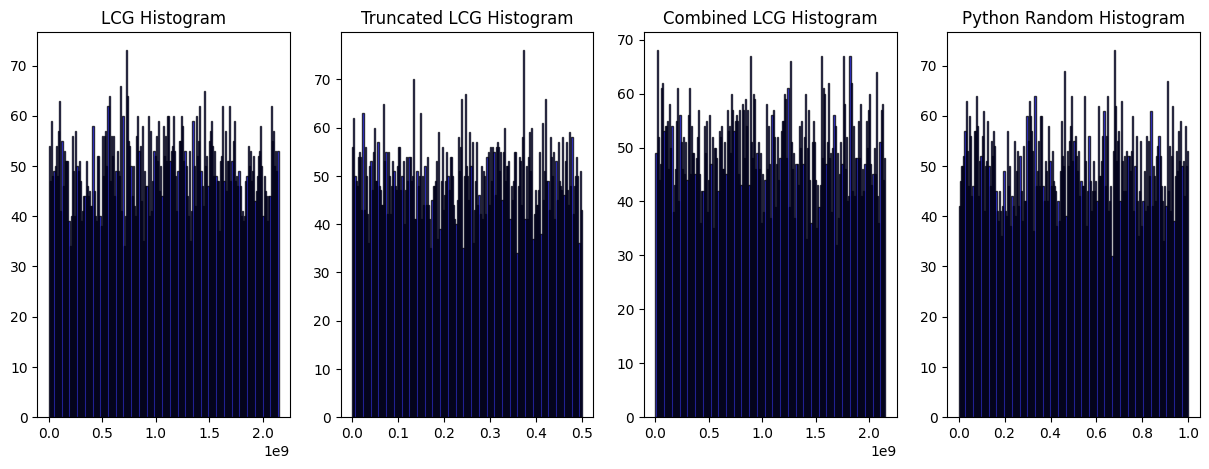

In [66]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.hist(lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("LCG Histogram")

plt.subplot(142)
plt.hist(truncated_lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Truncated LCG Histogram")

plt.subplot(143)
plt.hist(combined_lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Combined LCG Histogram")

plt.subplot(144)
plt.hist(python_random_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Python Random Histogram")

plt.show()